In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

<ipython-input-2-2ade22a405a4>:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(6):


  0%|          | 0/6 [00:00<?, ?it/s]

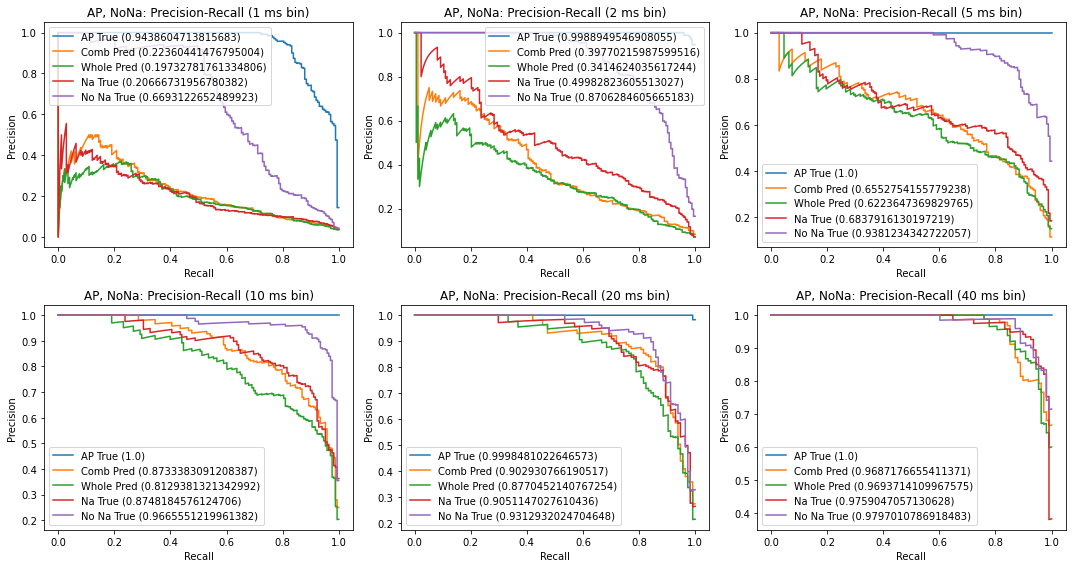

In [2]:
ms_list = [1,2,5,10,20,40]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (15,8))

auc_array = np.zeros((20,6))

for i in tnrange(6):
    length = int(50000/ms_list[i]/5)
    ap_true = np.load("/media/hdd01/sklee/CA1_clust4-60_aSoma/ap_true/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    na_true = np.load("/media/hdd01/sklee/CA1_clust4-60_aSoma/na_true/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    nona_true = np.load("/media/hdd01/sklee/CA1_clust4-60_aSoma/nona_true/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    comb_pred = np.load("/media/hdd01/sklee/CA1_clust4-60_aSoma/comb_pred/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    whole_pred = np.load("/media/hdd01/sklee/CA1_clust4-60_aSoma/whole_pred/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    spk = np.load("/media/hdd01/sklee/CA1_clust4-60_aSoma/data/spike_train_"+str(ms_list[i])+"ms.npy")[980*length:].flatten()
    
    prec_comb_pred, rec_comb_pred, _ = precision_recall_curve(spk, comb_pred)
    prec_whole_pred, rec_whole_pred, _ = precision_recall_curve(spk, whole_pred)
    prec_ap_true, rec_ap_true, _ = precision_recall_curve(spk, ap_true)
    prec_na_true, rec_na_true, _ = precision_recall_curve(spk, na_true)
    prec_nona_true, rec_nona_true, _ = precision_recall_curve(spk, nona_true)
    
    prarea_comb_pred = metrics.auc(rec_comb_pred, prec_comb_pred)
    prarea_whole_pred = metrics.auc(rec_whole_pred, prec_whole_pred)
    prarea_ap_true = metrics.auc(rec_ap_true, prec_ap_true)
    prarea_na_true = metrics.auc(rec_na_true, prec_na_true)
    prarea_nona_true = metrics.auc(rec_nona_true, prec_nona_true)
    
    row = i//3
    col = i - row*3
    axs[row,col].plot(rec_ap_true, prec_ap_true, label="AP True ("+str(prarea_ap_true)+")")
    axs[row,col].plot(rec_comb_pred, prec_comb_pred, label="Comb Pred ("+str(prarea_comb_pred)+")")
    axs[row,col].plot(rec_whole_pred, prec_whole_pred, label="Whole Pred ("+str(prarea_whole_pred)+")")
    axs[row,col].plot(rec_na_true, prec_na_true, label="Na True ("+str(prarea_na_true)+")")
    axs[row,col].plot(rec_nona_true, prec_nona_true, label="No Na True ("+str(prarea_nona_true)+")")
    axs[row,col].legend()
    axs[row,col].set_title("AP, NoNa: Precision-Recall ("+str(ms_list[i])+" ms bin)")
    axs[row,col].set_xlabel("Recall")
    axs[row,col].set_ylabel("Precision")
    
fig.tight_layout()

In [3]:
ms_list = [1,2,5,10]
auc_array = np.zeros((4,12,20))

for i in tnrange(4):
    length = int(50000/ms_list[i]/5)
    ap_true_all = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/ap_true/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    na_true_all = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_true/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    nona_true_all = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/nona_true/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    comb_pred_all = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/comb_pred/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    whole_pred_all = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/whole_pred/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    diff_true_all = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/diff_true/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    diff_pred_all = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/diff_pred/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    nona_pred_all = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/nona_pred/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    na_true_late_all = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_true_late/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    comb_pred_late_all = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/comb_pred_late/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    na_true_nona_pred_all = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_true_nona_pred/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    na_pred_nona_true_all = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_pred_nona_true/gru_l20_h40_"+str(ms_list[i])+"ms_test.npy").flatten()
    
    spk_all = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/spike_train_"+str(ms_list[i])+"ms.npy")[980*length:].flatten()
    
    for j in range(20):
        ap_true = ap_true_all[j*length:(j+1)*length]
        na_true = na_true_all[j*length:(j+1)*length]
        nona_true = nona_true_all[j*length:(j+1)*length]
        comb_pred = comb_pred_all[j*length:(j+1)*length]
        whole_pred = whole_pred_all[j*length:(j+1)*length]
        diff_true = diff_true_all[j*length:(j+1)*length]
        diff_pred = diff_pred_all[j*length:(j+1)*length]
        nona_pred = nona_pred_all[j*length:(j+1)*length]
        na_true_late = na_true_late_all[j*length:(j+1)*length]
        comb_pred_late = comb_pred_late_all[j*length:(j+1)*length]
        na_true_nona_pred = na_true_nona_pred_all[j*length:(j+1)*length]
        na_pred_nona_true = na_pred_nona_true_all[j*length:(j+1)*length]
        spk = spk_all[j*length:(j+1)*length]
        
        prec_comb_pred, rec_comb_pred, _ = precision_recall_curve(spk, comb_pred)
        prec_whole_pred, rec_whole_pred, _ = precision_recall_curve(spk, whole_pred)
        prec_ap_true, rec_ap_true, _ = precision_recall_curve(spk, ap_true)
        prec_na_true, rec_na_true, _ = precision_recall_curve(spk, na_true)
        prec_nona_true, rec_nona_true, _ = precision_recall_curve(spk, nona_true)
        prec_diff_true, rec_diff_true, _ = precision_recall_curve(spk, diff_true)
        prec_diff_pred, rec_diff_pred, _ = precision_recall_curve(spk, diff_pred)
        prec_nona_pred, rec_nona_pred, _ = precision_recall_curve(spk, nona_pred)
        prec_na_true_late, rec_na_true_late, _ = precision_recall_curve(spk, na_true_late)
        prec_comb_pred_late, rec_comb_pred_late, _ = precision_recall_curve(spk, comb_pred_late)
        prec_na_true_nona_pred, rec_na_true_nona_pred, _ = precision_recall_curve(spk, na_true_nona_pred)
        prec_na_pred_nona_true, rec_na_pred_nona_true, _ = precision_recall_curve(spk, na_pred_nona_true)

        prarea_comb_pred = metrics.auc(rec_comb_pred, prec_comb_pred)
        prarea_whole_pred = metrics.auc(rec_whole_pred, prec_whole_pred)
        prarea_ap_true = metrics.auc(rec_ap_true, prec_ap_true)
        prarea_na_true = metrics.auc(rec_na_true, prec_na_true)
        prarea_nona_true = metrics.auc(rec_nona_true, prec_nona_true)
        prarea_diff_true = metrics.auc(rec_diff_true, prec_diff_true)
        prarea_diff_pred = metrics.auc(rec_diff_pred, prec_diff_pred)
        prarea_nona_pred = metrics.auc(rec_nona_pred, prec_nona_pred)
        prarea_na_true_late = metrics.auc(rec_na_true_late, prec_na_true_late)
        prarea_comb_pred_late = metrics.auc(rec_comb_pred_late, prec_comb_pred_late)
        prarea_na_true_nona_pred = metrics.auc(rec_na_true_nona_pred, prec_na_true_nona_pred)
        prarea_na_pred_nona_true = metrics.auc(rec_na_pred_nona_true, prec_na_pred_nona_true)
        
        auc_array[i,0,j] = prarea_ap_true
        auc_array[i,1,j] = prarea_na_true
        auc_array[i,2,j] = prarea_nona_true
        auc_array[i,3,j] = prarea_comb_pred
        auc_array[i,4,j] = prarea_whole_pred
        auc_array[i,5,j] = prarea_diff_true
        auc_array[i,6,j] = prarea_diff_pred
        auc_array[i,7,j] = prarea_nona_pred
        auc_array[i,8,j] = prarea_na_true_late
        auc_array[i,9,j] = prarea_comb_pred_late
        auc_array[i,10,j] = prarea_na_true_nona_pred
        auc_array[i,11,j] = prarea_na_pred_nona_true

<ipython-input-3-020297d1046d>:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(4):


  0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-5-2085e6c2d325>:76: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


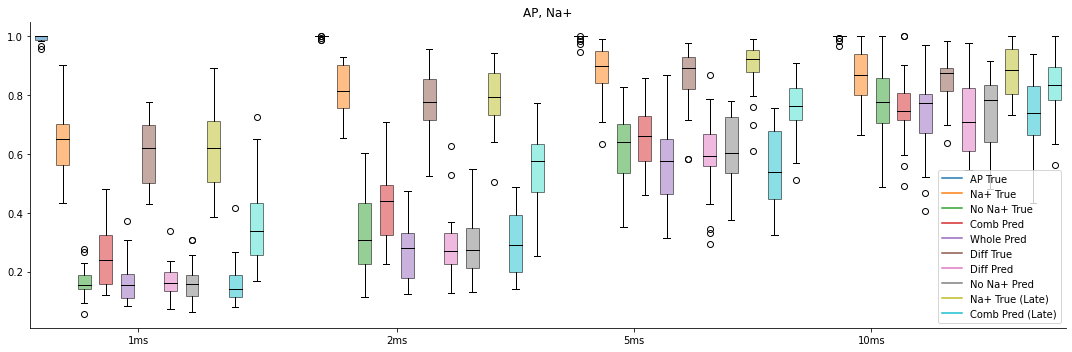

In [5]:
fig = plt.figure(constrained_layout=True, figsize = (15,5))
gs = fig.add_gridspec(1,1, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])

colors = ["tab:blue","tab:orange","tab:green",
         "tab:red","tab:purple","tab:brown","tab:pink","tab:gray",
         "tab:olive","tab:cyan","turquoise","lime"]

# first boxplot pair
bp = ax.boxplot(auc_array[0].T, positions = np.arange(0,12,1), widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# first boxplot pair
bp = ax.boxplot(auc_array[1].T, positions = np.arange(14,26,1), widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# first boxplot pair
bp = ax.boxplot(auc_array[2].T, positions = np.arange(28,40,1), widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# first boxplot pair
bp = ax.boxplot(auc_array[3].T, positions = np.arange(42,54,1), widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
ax.set_xticks([4.5,16.5,27.5,38.5])
ax.set_xticklabels(["1ms", "2ms", "5ms", "10ms"])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_title("AP, Na+")

h1, = ax.plot(1,1,'tab:blue')
h2, = ax.plot(1,1,'tab:orange')
h3, = ax.plot(1,1,'tab:green')
h4, = ax.plot(1,1,'tab:red')
h5, = ax.plot(1,1,'tab:purple')
h6, = ax.plot(1,1,'tab:brown')
h7, = ax.plot(1,1,'tab:pink')
h8, = ax.plot(1,1,'tab:gray')
h9, = ax.plot(1,1,'tab:olive')
h10, = ax.plot(1,1,'tab:cyan')
h11, = ax.plot(1,1,'turquoise')
h12, = ax.plot(1,1,'lime')

ax.legend((h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12),('AP True','Na+ True','No Na+ True','Comb Pred',
                                           'Whole Pred', 'Diff True', 'Diff Pred', 'No Na+ Pred',
                                           'Na+ True (Late)', 'Comb Pred (Late)', "Diff True & No Na+ Pred",
                                           "Diff Pred & No Na+ True"))
h1.set_visible(False)
h2.set_visible(False)
h3.set_visible(False)
h4.set_visible(False)
h5.set_visible(False)
h6.set_visible(False)
h7.set_visible(False)
h8.set_visible(False)
h9.set_visible(False)
h10.set_visible(False)
h11.set_visible(False)
h11.set_visible(False)
h12.set_visible(False)

fig.tight_layout()
plt.show()

In [7]:
ap_true_q1 = np.quantile(auc_array[:,0,:], 0.25, 1)
ap_true_q3 = np.quantile(auc_array[:,0,:], 0.75, 1)

na_true_q1 = np.quantile(auc_array[:,1,:], 0.25, 1)
na_true_q3 = np.quantile(auc_array[:,1,:], 0.75, 1)

nona_true_q1 = np.quantile(auc_array[:,2,:], 0.25, 1)
nona_true_q3 = np.quantile(auc_array[:,2,:], 0.75, 1)

comb_pred_q1 = np.quantile(auc_array[:,3,:], 0.25, 1)
comb_pred_q3 = np.quantile(auc_array[:,3,:], 0.75, 1)

whole_pred_q1 = np.quantile(auc_array[:,4,:], 0.25, 1)
whole_pred_q3 = np.quantile(auc_array[:,4,:], 0.75, 1)

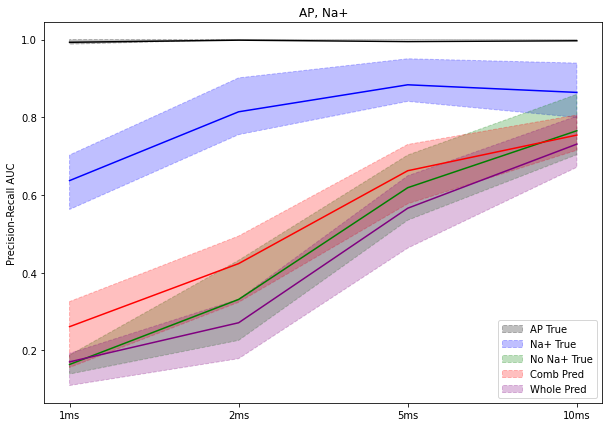

In [12]:
plt.figure(figsize = (10,7))

plt.plot(np.mean(auc_array[:,0,:], 1), color="black")
plt.fill_between(np.arange(4), ap_true_q1, ap_true_q3, alpha=0.25,
                 linestyle="--", linewidth=1, edgecolor="black", facecolor="black", label="AP True")

plt.plot(np.mean(auc_array[:,1,:], 1), color="blue")
plt.fill_between(np.arange(4), na_true_q1, na_true_q3, alpha=0.25,
                 linestyle="--", linewidth=1, edgecolor="blue", facecolor="blue", label="Na+ True")

plt.plot(np.mean(auc_array[:,2,:], 1), color="green")
plt.fill_between(np.arange(4), nona_true_q1, nona_true_q3, alpha=0.25,
                 linestyle="--", linewidth=1, edgecolor="green", facecolor="green", label="No Na+ True")

plt.plot(np.mean(auc_array[:,3,:], 1), color="red")
plt.fill_between(np.arange(4), comb_pred_q1, comb_pred_q3, alpha=0.25,
                 linestyle="--", linewidth=1, edgecolor="red", facecolor="red", label="Comb Pred")

plt.plot(np.mean(auc_array[:,4,:], 1), color="purple")
plt.fill_between(np.arange(4), whole_pred_q1, whole_pred_q3, alpha=0.25,
                 linestyle="--", linewidth=1, edgecolor="purple", facecolor="purple", label="Whole Pred")

plt.xticks(ticks=np.arange(4), labels=["1ms","2ms","5ms","10ms"])
plt.legend()
plt.ylabel("Precision-Recall AUC")
plt.title("AP, Na+")
plt.show()